In [42]:
import matplotlib.pyplot as plt
import numpy as np 
import torch
import pickle
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
def get_quantile(samples,q,dim=1):
    return torch.quantile(samples,q,dim=dim).cpu().numpy()

In [43]:
datafolder = 'financial_fold0_20221210_092501/' # set the folder name
nsample = 2 # number of generated sample

path = '/content/drive/My Drive/CSDI-main/save/'+datafolder+'/generated_outputs_nsample' + str(nsample) + '.pk' 
with open(path, 'rb') as f:
    samples,all_target,all_evalpoint,all_observed,all_observed_time,scaler,mean_scaler = pickle.load(f)

    print(samples.shape)
all_target_np = all_target.cpu().numpy()
all_evalpoint_np = all_evalpoint.cpu().numpy()
all_observed_np = all_observed.cpu().numpy()
all_given_np = all_observed_np - all_evalpoint_np

K = samples.shape[-1] #feature
L = samples.shape[-2] #time length

np_samples = samples.cpu().detach().numpy()

np_samples = np.squeeze(np_samples)

 

torch.Size([1, 2, 4788, 5])


In [44]:
sample_mean = np.zeros([1,L,K])
sample_std = np.zeros([1,L,K])

sample_mean = np.mean(np_samples, axis=0)
#print(sample_mean.shape)

sample_std = np.std(np_samples, axis=0)
#print(sample_std.shape)

samples_new = np.zeros([nsample,L,K])
samples_new = np.repeat(sample_mean[np.newaxis, :, :], nsample, axis=0)

samples_full = np.zeros([1,nsample,L,K])
samples_full = np.repeat(samples_new[np.newaxis,: :, :],1, axis=0)

tor_sample_mean = torch.tensor(samples_full)
print(tor_sample_mean.shape)

torch.Size([1, 2, 4788, 5])


In [45]:
qlist =[0.05,0.25,0.5,0.75,0.95]
quantiles_imp = []
for q in qlist:
    #quantiles_imp.append(get_quantile(tor_sample_mean, q, dim=1)*(1-all_given_np) + all_target_np * all_given_np)
    quantiles_imp.append(get_quantile(samples, q, dim=1)*(1-all_given_np) + all_target_np * all_given_np)
    #quantiles_imp.append(get_quantile(samples, q, dim=1))

(0.0, 1596.0)

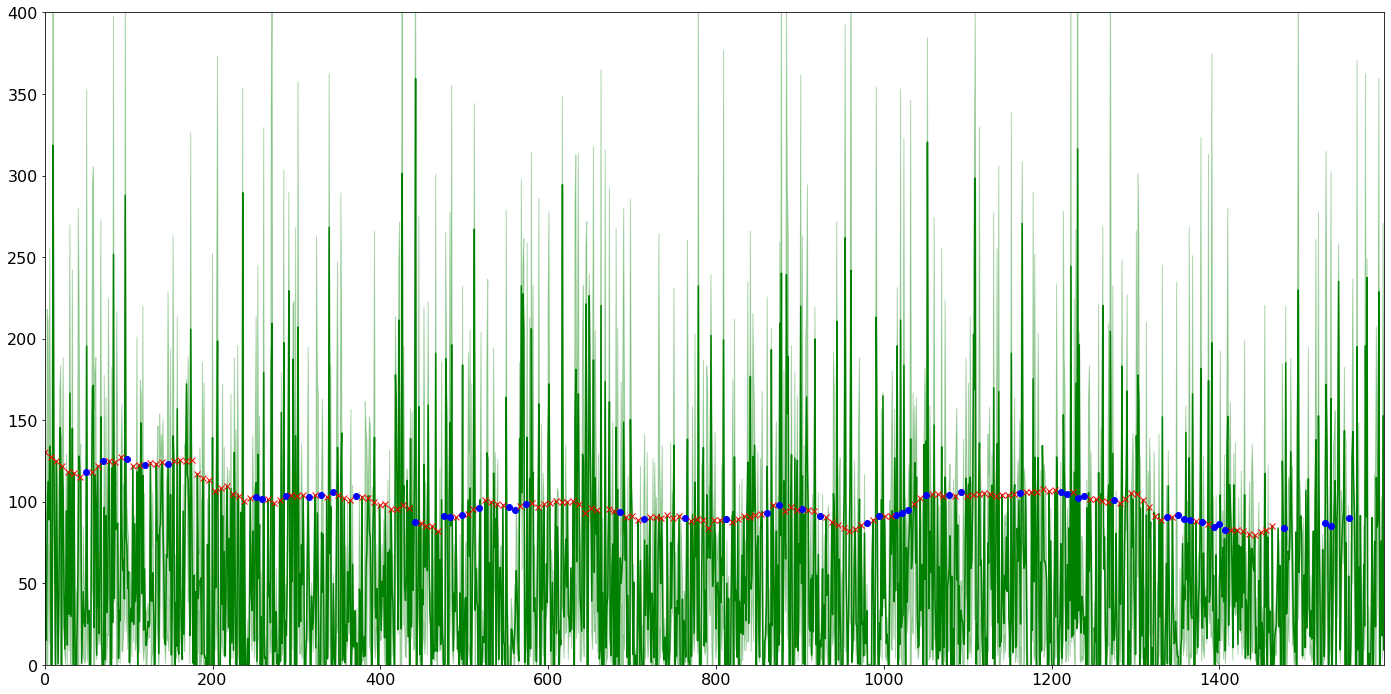

In [46]:
dataind = 0 #change to visualize a different time-series sample

plt.rcParams["font.size"] = 16
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(24.0, 12.0))
#fig.delaxes(axes[-1][-1])

"""  >>> We only care about Px so I did not plot the other graphs <<< 
for k in range(K):  # iterates over the features
  df = pd.DataFrame({"x":np.arange(0,L), "val":all_target_np[dataind,:,k], "y":all_evalpoint_np[dataind,:,k]})
  df = df[df.y != 0]
  df2 = pd.DataFrame({"x":np.arange(0,L), "val":all_target_np[dataind,:,k], "y":all_given_np[dataind,:,k]})
  df2 = df2[df2.y != 0]
  row = k % 5
  col = k // 5
  axes[row][col].plot(range(0, L), quantiles_imp[2][dataind,:,k], color = 'g',linestyle='solid',label='CSDI')
  axes[row][col].fill_between(range(0, L), quantiles_imp[0][dataind,:,k], quantiles_imp[4][dataind,:,k], color='g', alpha=0.3)
  axes[row][col].plot(df.x.iloc[:159], df.val.iloc[:159], color = 'b',marker = 'o', linestyle='None')
  axes[row][col].plot(df2.x.iloc[:159], df2.val.iloc[:159], color = 'r',marker = 'x', linestyle='None')
  axes[row][col].set_ylim([0,300])
  axes[row][col].set_xlim([0,30])
  break
  if col == 0:
      plt.setp(axes[row, 0], ylabel='value')
  if row == -1:
      plt.setp(axes[-1, col], xlabel='time')
"""
df = pd.DataFrame({"x":np.arange(0,L), "val":all_target_np[dataind,:,0], "y":all_evalpoint_np[dataind,:,0]})
df = df[df.y != 0]
df2 = pd.DataFrame({"x":np.arange(0,L), "val":all_target_np[dataind,:,0], "y":all_given_np[dataind,:,0]})
df2 = df2[df2.y != 0]
plt.plot(range(0, L), quantiles_imp[2][dataind,:,0], color = 'g',linestyle='solid',label='CSDI')
plt.fill_between(range(0, L), quantiles_imp[0][dataind,:,0], quantiles_imp[4][dataind,:,0], color='g', alpha=0.3)
plt.plot(df.x.iloc[:159], df.val.iloc[:159], color = 'b',marker = 'o', linestyle='None')
plt.plot(df2.x.iloc[:159], df2.val.iloc[:159], color = 'r',marker = 'x', linestyle='None')
plt.ylim([0,400])
plt.xlim([0,1596])
#plt.xlim([1597,3192])
#plt.xlim([3193,4787])